# Aprendiendo git

Este documento fué generado con el objetivo de capacitar a los colegas de la _Coordinación de Repositorios, Investigación y Prospectiva (CRIP)_ en un pequeño curso acerca de ```git```, pues es una habilidad con la que todo desarrollador de software debe de contar.

No existen conceptos nuevos en este documento, no estoy inventando el hilo negro, y simplemente es una recopilación de libros y cursos gratis que existen en línea. La mayoría de los conceptos son tomados del libro [**_Pro Git_**](https://git-scm.com/book/en/v2), escrito por _Scott Chacon_ y _Ben Straub_. Este libro forma parte de la documentación oficial de git y se puede encontrar en muchos idiomas. La versión que utilizé para este curso es la segunda versión en inglés, que es la que actualmente se encuentra en la página oficial. Las demás fuentes y referencias las cito al final de este documento.

Si gustan compartir y distribuir este material son libres de hacerlo.
Cualquier duda me pueden escribir a mi correo ```pradel.paulina@ciencias.unam.mx``` o pueden buscar mi github con el usuario ```@paupradel```.

## 1. ¿Qué es el control de versionamiento?

Según Scott Chacon y Ben Straub en su libro _Pro Git_ se puede definir como:

>Un sistema (en este caso un software) que registra los cambios a un archivo o conjunto de archivos a lo largo del tiempo para que después se puedan recordar o "llamar" versiones específicas de los mismos.

Lo anterior tiene la gran ventaja de que si se llegan a perder archivos o existe alguna equivocación, de manera rápida se puede regresar a una versión reciente.

Un ejemplo muy sencillo de un Sistema de Control de Versionamiento (VCS) puede ser Google Docs. Ahí automáticamente se van guardando los cambios que se le hace al archivo, y uno puede revisar las versiones anteriores, así como regresar a ellas.

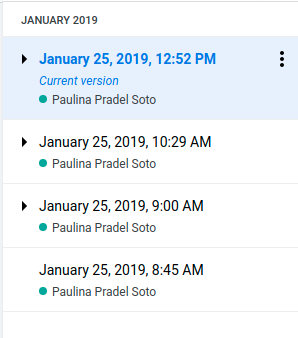

## 1.1 Tipos de sistemas

### 1.1.1. Sistemas locales de control de versionamiento.

Es simplemente una base datos local que registra los cambios hechos a los archivos que se encuentran bajo el control de versionamiento. Esto se ilustra en la siguiente figura tomada del libro [**_Pro Git_**](https://git-scm.com/book/en/v2). Un ejemplo de este tipo de sistema es el [**RCS**](https://www.gnu.org/software/rcs/).

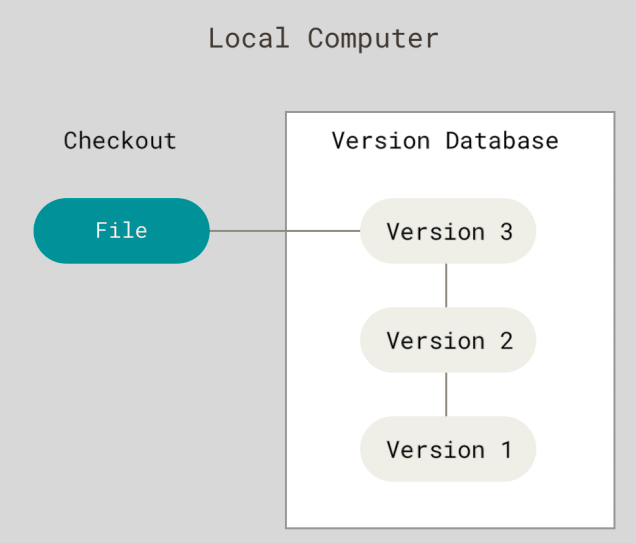

### 1.1.2. Sistemas centralizados de control de versionamiento (CVCS).

Este es un servidor que contiene todos los archivos versionados y varios clientes que obtienen la última versión del archivo seleccionado desde el servidor central. Ejemplos de estos sistemas son _CVS, Subversion, Perforce,_ etc. 

Un sistema configurado de esta manera permiten que varias personas puedan colaborar al mismo tiempo y conocer hasta cierto punto en que parte del desarrollo se encuentran las distintas personas involucradas.

Una desventaja visible es la potencial falla del servidor centralizado. Este puede quedarse "abajo" un cierto periodo de tiempo y no registrar los cambios hechos a los archivos, o bien el disco duro del servidor puede fallar y perder absolutamente todo el versionamiento del proyecto.

La configuración de este tipo de sistema se observa en la siguiente figura obtenida del libro [**_Pro Git_**](https://git-scm.com/book/en/v2).

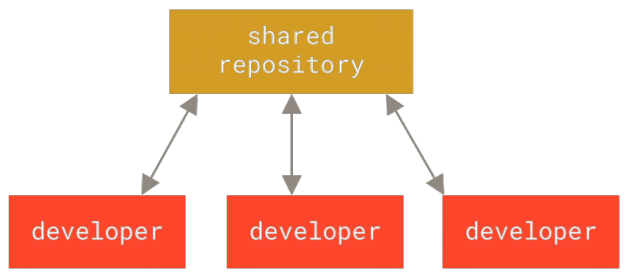

### 1.1.3 Sistemas distribuidos de control de versionamiento (DVCS).

A diferencia de los CVCS, los usuarios de estos sistemas no obtienen el último versionamiento del archivo, más bien obtienen un clon de todo el respositorio, incluyendo la historia de versionamiento. De esta manera cada clon del repositorio es un backup entero de todos archivos.

Una ventaja de este tipo de sistemas es la posibilidad de tener diferentes flujos de trabajo, ya que permite la colaboración entre distintos grupos de personas en distintas partes del proyecto, pero de manera simultánea.

_Git, Mercurial, Bazaar_ son ejemplos de este tipo de sistemas. Un esquema de los _DVCS's_ se encuentra en la siguiente figura sacada del libro [**_Pro Git_**](https://git-scm.com/book/en/v2).

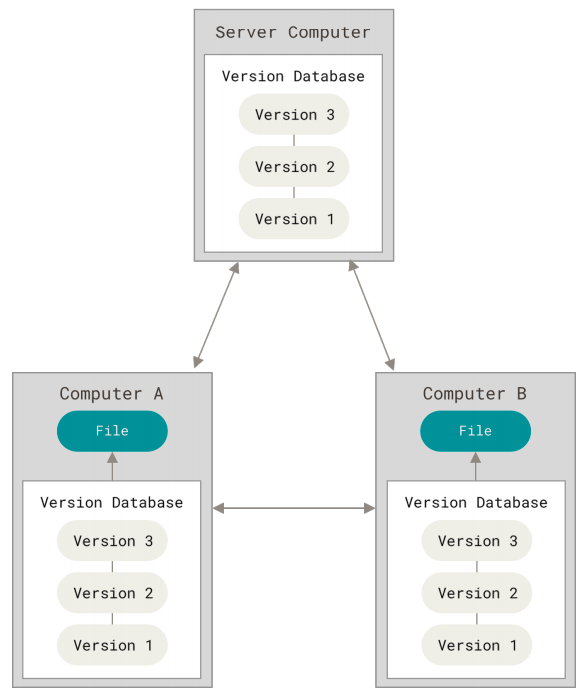

## 1.2 Git

```Git``` nació como la necesidad de que la comunidad de desarrolladores de Linux contara con su propia herramienta de control de versionamiento, un DVCS, ya que desde 2005 la relacion entre los desarrolladores del kernel de Linux y la compañía que realizaba la función del DVCS, Bitkeeper, se fracturó. Esto llevó particularmente a Linus Torvalds (el creador de Linux) a desarrollar una herramienta que fuera rápida, de diseño simple, con gran soporte para el desarrollo no lineal, totalmente distribuida y capaz de manejar grandes projectos eficientemente, como el kernel de Linux. De esta manera surgió ```Git```.

### 1.2.1 ¿Qué hace a git diferente de otros sistemas de control de versionamiento?

#### 1.2.1.1 Instantáneas

La mayoría de los VCS funcionan como un conjunto de archivos y una lista de los cambios hechos en los mismos a lo largo del tiempo _(delta-based version control)_. Esto se puede ver en la siguiente figura (libro [**_Pro Git_**](https://git-scm.com/book/en/v2)).

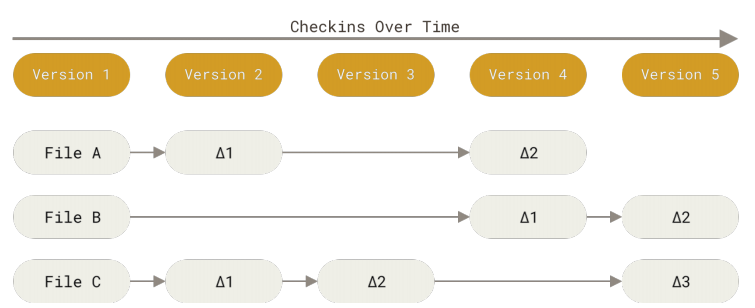

De manera contraria, lo que hace ```git``` es guardar "instantáneas" del conjunto de archivos en cuestión. Es decir, cada vez que se quiere guardar el estado de un proyecto, ```git``` toma una fotografía de como lucen tus archivos al momento de guardarlos y hace una referencia a dicha fotografía. Si no hay ningún cambio en los archivos, entonces simplemente ```git``` no guarda nada, y deja la versión anterior como la más reciente. Esto se ilustra en la siguiente figura (libro [**_Pro Git_**](https://git-scm.com/book/en/v2)).

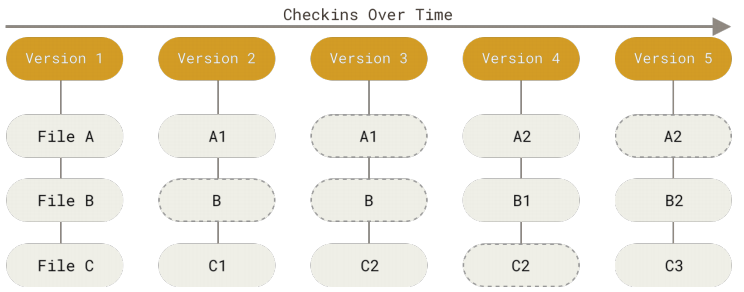

#### 1.2.1.2 Operaciones en local

Debido a que toda la historia del proyecto esta guardada en tu disco local, no se necesita de prácticamente ninguna información en otra computadora para hacer operaciones. Esto le da mucha rapidez a ```git``` a comparación de otros VCS, que necesitan ir al servidor para consultar la historia del proyecto y desplegarla en tu pantalla.

De la misma manera es posible trabajar mientras estas _offline_. ```git``` permite hacer ```commits``` (más adelante se explicará a que se refiere con esto) de manera local y una vez que se tenga una conexión segura, se pueden "subir" los cambios.

#### 1.2.1.3 Integración

```git``` utiliza una suma de comprobación (checksum) para verificar los datos guardados y absolutamente todo lo hecho en ```git``` esta referido bajo esta suma. El método utilizado se llama _hash SHA-1_ y es una cadena de txto de 40 caractéres compuesta de hexadecimales y calculada basándose en el contenido del archivo o directorio en el que este trabajando ```git```.

#### 1.2.1.4 Generalmente git sólo agrega información

Las operaciones realizadas en ```git``` usualmente sólo agregan información al a base de datos de ```git```. De esta manera aunque se pueden perder cambios no confirmados (committed) todavía, aquellos que si lo estén es difícil que se pierdan, o más bien dicho que se pierda la información de estos cambios.

#### 1.2.1.5 Tres estados

Cuando se esta trabajando con ```git``` es muy importante comprender que los archivos que están bajo este control de versionamiento se encuentran en tres estados.

- **Modificados (modified)**. Se han hecho cambios en el archivo, pero no han sido confirmados (committed).
- **Preparado (staged)**. Se ha marcado un archivo que ha sido modificado en la versión acutal para confirmarlo en la siguiente "instantánea".
- **Committed (confirmado)**. La información esta guardada de manera segura en la base de datos local.

Dado estos estados existen entonces tres secciones principales en un proyecto de ```git```,

- **Directorio de Trabajo (Working Directory o Working Tree)**. Es una copia de una versión del proyecto. Se obtiene de la base de datos del Directorio de ```git``` y se guardan en local. 
- **Área de Preparación (Staging Area)**. Generalmente es un archivo que guarda la información acerca de la próxima confirmación (commit).
- **Directorio de ```git``` (```git``` Directory)**. Aquí es donde se guardan los metadatos y la base de datos de los objetos del proyecto. Esto es lo que se _copia_ cuando se _clona_ un repositorio de ```git```.

La siguiente figura ilustra estas tres secciones principales (libro [**_Pro Git_**](https://git-scm.com/book/en/v2)).

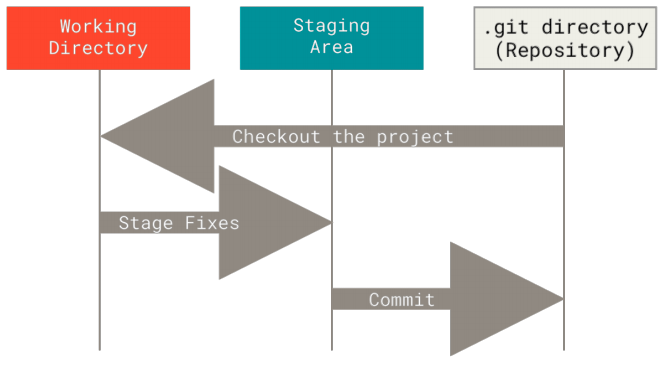

Como también se puede observar en la figura anterior el flujo de trabajo en ```git``` va como sigue: Primero se realizan cambios en los archivos del Directorio de Trabajo (modificados), después se seleccionan los cambios que se desean formen parte de la siguiente confirmación en el Área de Preparación (staged) y por último se realiza la confirmación de los archivos del Área de Preparación y les tomará la "instatánea" para guardarla en el Directorio de ```git``` (committed).

## 2. Instalación

### 2.1 Linux

### 2.2 Windows

### 2.3 MacOS

## 3. Comandos básicos

## 4. Branches

## 5. README.md y .gitignore

## 6. Clonar repositorios

## 7. Interfaces gŕaficas (GUI)